In [1]:

from binarybeech.binarybeech import *


In [2]:

df = pd.read_csv("data/titanic.csv")
df_titanic = df.sample(frac=0.75)
df_test = df.loc[df.index.difference(df_titanic),:]
    

In [3]:
gbt_titanic = GradientBoostedTree(df_titanic.copy(),"Survived")

In [4]:
gbt_titanic.X_names

['Pclass',
 'Name',
 'Sex',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [5]:

gbt_titanic._initial_model()


0



(<binarybeech.binarybeech.Tree at 0x7fe394634290>, 0.6165413533834586)

In [6]:
it=gbt_titanic._initial_tree()
it.tree.show()


Computed split:
loss: 0.17 (parent: 0.24)
attribute: Sex
threshold: ('female',)
count: [230, 435]
A tree with 2 leafs was created
0.38345864661654133



In [7]:
it.tree.root

In [8]:

gbt_titanic.learning_rate=0.5
gbt_titanic.create_trees(20)



>>> 12.5386620144568
Computed split:
loss: 0.17 (parent: 0.24)
attribute: Sex
threshold: ('female',)
count: [230, 435]
Computed split:
loss: 0.13 (parent: 0.19)
attribute: Pclass
threshold: 2.236073938360776
count: [122, 108]
Computed split:
loss: 0.03 (parent: 0.03)
attribute: Age
threshold: 7.229862691259475
count: [5, 117]
Computed split:
loss: 0.02 (parent: 0.02)
attribute: Fare
threshold: 13.021695087265835
count: [21, 96]
Computed split:
loss: 0.21 (parent: 0.25)
attribute: Fare
threshold: 24.28978159113305
count: [87, 21]
Computed split:
loss: 0.23 (parent: 0.24)
attribute: Age
threshold: 35.090687663946056
count: [81, 6]
Computed split:
loss: 0.08 (parent: 0.09)
attribute: Fare
threshold: 31.898373050088495
count: [12, 9]
Computed split:
loss: 0.15 (parent: 0.15)
attribute: Pclass
threshold: 1.472141915860566
count: [98, 337]
Computed split:
loss: 0.21 (parent: 0.22)
attribute: Age
threshold: 49.13014759763158
count: [71, 27]
Computed split:
loss: 0.23 (parent: 0.24)
attribute

In [9]:

gbt_titanic.predict(df_titanic.iloc[0])

0.2728317863787222

In [10]:

gbt_titanic.validate(df_test)


{'precision': array([0.91009174, 0.79239766]),
 'recall': array([0.87477954, 0.846875  ]),
 'F-score': 0.8554087243800126,
 'accuracy': 0.8647125140924464}

#k-fold cross-validation

In [11]:

c = CART(df_titanic,"Survived",metrics_type="classification")


Computed split:
loss: 0.33 (parent: 0.47)
attribute: Sex
threshold: ('female',)
count: [230, 435]
Computed split:
loss: 0.27 (parent: 0.38)
attribute: Pclass
threshold: 2.236073938360776
count: [122, 108]
Computed split:
loss: 0.05 (parent: 0.06)
attribute: Name
threshold: ('Miss. Annie Clemmer Funk',)
count: [1, 121]
Computed split:
loss: 0.03 (parent: 0.05)
attribute: Name
threshold: ('Miss. Helen Loraine Allison',)
count: [1, 120]
Computed split:
loss: 0.02 (parent: 0.03)
attribute: Name
threshold: ('Miss. Henriette Yrois',)
count: [1, 119]
Computed split:
loss: 0.00 (parent: 0.02)
attribute: Name
threshold: ('Mrs. (Mary) Mack',)
count: [1, 118]
Computed split:
loss: 0.42 (parent: 0.50)
attribute: Fare
threshold: 24.289781591133043
count: [87, 21]
Computed split:
loss: 0.45 (parent: 0.48)
attribute: Age
threshold: 35.09068766394607
count: [81, 6]
Computed split:
loss: 0.45 (parent: 0.47)
attribute: Siblings/Spouses Aboard
threshold: 1.5278687876119343
count: [77, 4]
Computed split:


/home/jovyan/binarybeech/metrics.py:106: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)


Computed split:
loss: 0.34 (parent: 0.47)
attribute: Sex
threshold: ('female',)
count: [183, 349]
Computed split:
loss: 0.26 (parent: 0.38)
attribute: Pclass
threshold: 2.236073938360776
count: [99, 84]
Computed split:
loss: 0.04 (parent: 0.06)
attribute: Name
threshold: ('Miss. Helen Loraine Allison',)
count: [1, 98]
Computed split:
loss: 0.02 (parent: 0.04)
attribute: Name
threshold: ('Miss. Henriette Yrois',)
count: [1, 97]
Computed split:
loss: 0.00 (parent: 0.02)
attribute: Name
threshold: ('Mrs. (Mary) Mack',)
count: [1, 96]
Computed split:
loss: 0.44 (parent: 0.50)
attribute: Fare
threshold: 33.51634122316379
count: [75, 9]
Computed split:
loss: 0.47 (parent: 0.50)
attribute: Age
threshold: 35.55581527134833
count: [66, 9]
Computed split:
loss: 0.47 (parent: 0.49)
attribute: Age
threshold: 21.337438746060222
count: [33, 33]
Computed split:
loss: 0.45 (parent: 0.50)
attribute: Fare
threshold: 22.532412284860026
count: [27, 6]
Computed split:
loss: 0.38 (parent: 0.49)
attribute: A

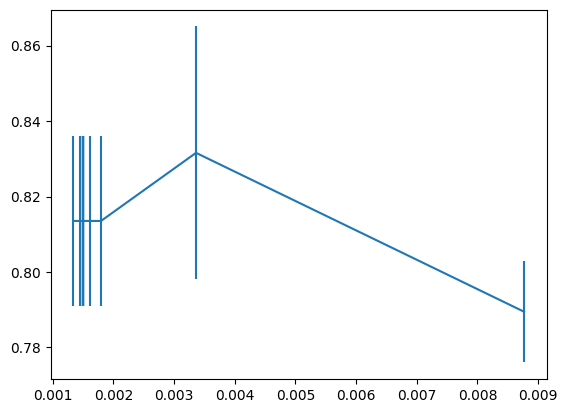

In [12]:
c.train()

In [13]:
c.validate(df_test)

{'precision': array([0.88990826, 0.6754386 ]),
 'recall': array([0.81375839, 0.79381443]),
 'F-score': 0.7899946417668048,
 'accuracy': 0.8072153325817362}